In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [44]:
data=pd.read_csv("NewspaperData.csv")
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [48]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [50]:
data_cleaned=data.drop(['Newspaper'],axis=1)
data_cleaned

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [51]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


{'whiskers': [<matplotlib.lines.Line2D at 0x1b30d692ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b30d5c8b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b30d44e3f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b30d716450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b30d7141d0>],
 'means': []}

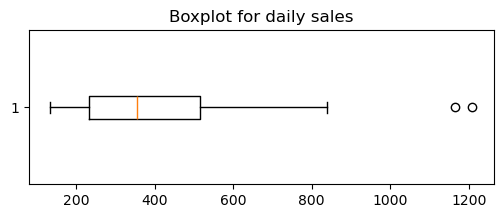

In [52]:
plt.figure(figsize=(6,2))
plt.title("Boxplot for daily sales")
plt.boxplot(data["daily"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b30d77da30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b30d77dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b30d77d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b30d77e450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b30d77e6f0>],
 'means': []}

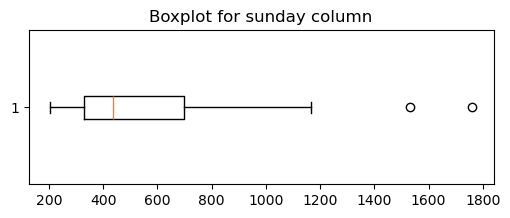

In [54]:
plt.figure(figsize=(6,2))
plt.title("Boxplot for sunday column")
plt.boxplot(data_cleaned["sunday"],vert=False)

<function matplotlib.pyplot.show(close=None, block=None)>

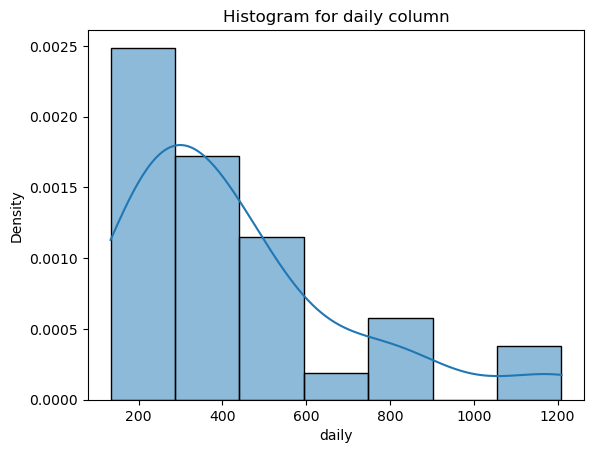

In [66]:
sns.histplot(data['daily'],kde=True,stat='density',)
plt.title("Histogram for daily column")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

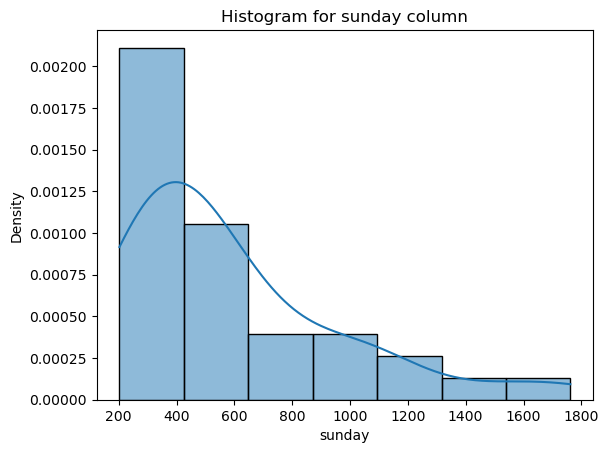

In [72]:
sns.histplot(data['sunday'],kde=True,stat='density',)
plt.title("Histogram for sunday column")
plt.show

****Observations:**
**1)there are no missing values.**
**2)the daily column values appears to be right-skewed**
**3)the sunday column values also appear to be right skewed.**
**4)there are two ouytliers in both daily and also in snday column as observed from the boxplot.****


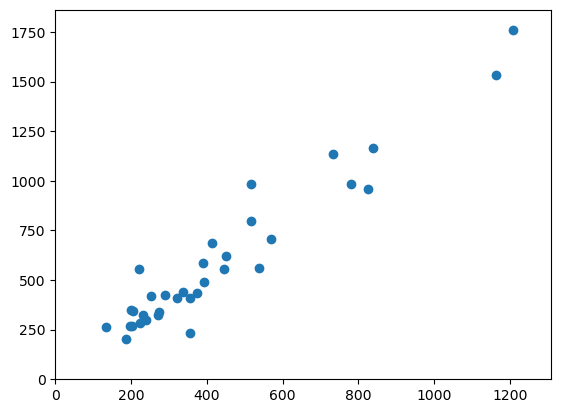

In [78]:
x=data['daily']
y=data['sunday']
plt.scatter(data['daily'],data['sunday'])
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

In [94]:
data['daily'].corr(data['sunday'])

0.9581543140785466

the relation between is seen to be linear as seen from scatter plot.
the corr is positive with pearsons corr coeff of 0.958154

In [92]:
data[['daily','sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
import statsmodels